In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PNAD2015 = pd.read_csv('PES2015.csv')
PNAD2011 = pd.read_csv('PES2011.csv')

<i>Projeto 1 - PNAD </i>

João Pedro Montefeltro Junqueira Meirelles

Hoje em dia temos milhares de pessoas com acesso a internet. E aqui pretendo analiser se existe ou não uma relação entre uma pessoa ter um celular ou acessar a internet com sua renda mensal, logo irei analisar a renda em cada região do pais, com o acesso de internet em cada uma delas.


In [2]:
# Limitando o DataFrame para ter apenas as pessoas menores de 12 anos completos
df_2015 = PNAD2015[PNAD2015.V8005 >= 18]
df_2011 = PNAD2011[PNAD2011.V8005 >= 18]

In [3]:
# Escolhendo as colunas que irei usar e retirando as que eu não irei e logo depois substituindo os NaNs por 0.0
df_2015 = df_2015[['UF','V8005','V9001','V9532','V061111','V061112',
                   'V061113','V061114','V061115','V061116','V06112']].copy()
df_2011 = df_2011[['UF','V8005','V9003','V9004','V9532','V06111','V06112',]].copy()
df_2015 = df_2015.fillna(0)
df_2011 = df_2011.fillna(0)

df_2015_limpa = df_2015.copy()

In [4]:
df_2015.UF = df_2015.UF.astype('category')
df_2015.UF = df_2015.V8005.astype('int64')
df_2015.V9003 = df_2015.V9001.astype('category')
df_2015.V9532 = df_2015.V9532.astype('int64')
df_2015.V061111 = df_2015.V061111.astype('category')
df_2015.V061112 = df_2015.V061112.astype('category')
df_2015.V061113 = df_2015.V061113.astype('category')
df_2015.V061114 = df_2015.V061114.astype('category')
df_2015.V061115 = df_2015.V061115.astype('category')
df_2015.V061116 = df_2015.V061116.astype('category')
df_2015.V06112 = df_2015.V06112.astype('category')


In [5]:
# Renomeando Variáveis


df_2015_limpa.loc[df_2015_limpa.V9001 == 1, 'V9001'] = 'Exerce'
df_2015_limpa.loc[df_2015_limpa.V9001 == 3, 'V9001'] = 'Não Exerce'
df_2015_limpa.loc[df_2015_limpa.V9001 == 0, 'V9001'] = 'Não se aplica'

df_2015_limpa.loc[df_2015_limpa.V9532 == 999999999999, 'V9532'] = 'Sem declaração'
df_2015_limpa.loc[df_2015_limpa.V9532 == np.nan, 'V9532'] = 'Sem declaração'

df_2015_limpa.loc[df_2015_limpa.V061111 == 1, 'V061111'] = 'Sim'
df_2015_limpa.loc[df_2015_limpa.V061111 == 3, 'V061111'] = 'Não'
df_2015_limpa.loc[df_2015_limpa.V061111 == 0, 'V061111'] = 'Não se aplica'

df_2015_limpa.loc[df_2015_limpa.V061112 == 1, 'V061112'] = 'Sim'
df_2015_limpa.loc[df_2015_limpa.V061112 == 2, 'V061112'] = 'Não'
df_2015_limpa.loc[df_2015_limpa.V061112 == 0, 'V061112'] = 'Não se aplica'

df_2015_limpa.loc[df_2015_limpa.V061113 == 1, 'V061113'] = 'Sim'
df_2015_limpa.loc[df_2015_limpa.V061113 == 2, 'V061113'] = 'Não'
df_2015_limpa.loc[df_2015_limpa.V061113 == 0, 'V061113'] = 'Não se aplica'

df_2015_limpa.loc[df_2015_limpa.V061114 == 1, 'V061114'] = 'Sim'
df_2015_limpa.loc[df_2015_limpa.V061114 == 2, 'V061114'] = 'Não'
df_2015_limpa.loc[df_2015_limpa.V061114 == 0, 'V061114'] = 'Não se aplica'

df_2015_limpa.loc[df_2015_limpa.V061115 == 1, 'V061115'] = 'Sim'
df_2015_limpa.loc[df_2015_limpa.V061115 == 2, 'V061115'] = 'Não'
df_2015_limpa.loc[df_2015_limpa.V061115 == 0, 'V061115'] = 'Não se aplica'

df_2015_limpa.loc[df_2015_limpa.V061116 == 1, 'V061116'] = 'Sim'
df_2015_limpa.loc[df_2015_limpa.V061116 == 2, 'V061116'] = 'Não'
df_2015_limpa.loc[df_2015_limpa.V061116 == 0, 'V061116'] = 'Não se aplica'

df_2015_limpa.loc[df_2015_limpa.V06112 == 1, 'V06112'] = 'Sim'
df_2015_limpa.loc[df_2015_limpa.V06112 == 3, 'V06112'] = 'Não'
df_2015_limpa.loc[df_2015_limpa.V06112 == 0, 'V06112'] = 'Não se aplica'

In [6]:
df_2015_limpa['UF'][df_2015_limpa.UF == 11] = 'Norte'
df_2015_limpa['UF'][df_2015_limpa.UF == 12] = 'Norte'
df_2015_limpa['UF'][df_2015_limpa.UF == 13] = 'Norte'
df_2015_limpa['UF'][df_2015_limpa.UF == 14] = 'Norte'
df_2015_limpa['UF'][df_2015_limpa.UF == 15] = 'Norte'
df_2015_limpa['UF'][df_2015_limpa.UF == 16] = 'Norte'
df_2015_limpa['UF'][df_2015_limpa.UF == 17] = 'Norte'

df_2015_limpa['UF'][df_2015_limpa.UF == 21] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 22] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 23] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 24] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 25] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 26] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 27] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 28] = 'Nordeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 29] = 'Nordeste'

df_2015_limpa['UF'][df_2015_limpa.UF == 31] = 'Sudeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 32] = 'Sudeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 33] = 'Sudeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 35] = 'Sudeste'

df_2015_limpa['UF'][df_2015_limpa.UF == 41] = 'Sul'
df_2015_limpa['UF'][df_2015_limpa.UF == 42] = 'Sul'
df_2015_limpa['UF'][df_2015_limpa.UF == 43] = 'Sul'

df_2015_limpa['UF'][df_2015_limpa.UF == 50] = 'Centro_Oeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 51] = 'Centro_Oeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 52] = 'Centro_Oeste'
df_2015_limpa['UF'][df_2015_limpa.UF == 53] = 'Centro_Oeste'

C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_2015_limpa = df_2015_limpa.rename(columns={'UF':'Região','V8005':'Idade',
                                              'V9001':'Trabalhou',
                                              'V9532':'Renda_Mensal',
                                              'V061111':'Utilizou_Internet',
                                              'V061112':'Computador',
                                              'V061113':'Internet_Celular',
                                              'V061114':'Internet_Tablet',
                                              'V061115':'Internet_TV',
                                              'V061116':'Internet_Outro',
                                              'V06112':'Tem_Celular'})

In [8]:
df_2015_limpa

,Região,Idade,Trabalhou,Renda_Mensal,Utilizou_Internet,Computador,Internet_Celular,Internet_Tablet,Internet_TV,Internet_Outro,Tem_Celular
0,Norte,23,Exerce,800,Não se aplica,Não,Sim,Não,Não,Não,Sim
1,Norte,23,Exerce,1150,Não se aplica,Sim,Sim,Não,Não,Não,Sim
2,Norte,35,Exerce,880,Não se aplica,Sim,Sim,Não,Não,Não,Sim
3,Norte,34,Exerce,3000,Não se aplica,Sim,Sim,Não,Não,Não,Sim
7,Norte,18,Exerce,880,Não se aplica,Sim,Sim,Não,Não,Não,Sim
8,Norte,46,Exerce,3500,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Sim
9,Norte,81,Não Exerce,0,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não
10,Norte,71,Não Exerce,0,Não se aplica,Sim,Não,Não,Não,Não,Não
11,Norte,47,Exerce,150,Não,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não
12,Norte,24,Não Exerce,0,Não se aplica,Não,Sim,Não,Não,Não,Sim


In [9]:
pd.crosstab(df_2015.V061111,df_2015.V9001)

V9001,1.0,3.0
V061111,,
0.0,99208,43926
1.0,1919,1168
3.0,52612,62801


In [10]:
renda = df_2015[['V9532','V061111','V061113','V061112']].copy()
df_2015['V9532'].describe()
renda = renda[(renda.V9532 != 999999999999) & (renda.V9532 != 0)]
renda.describe()

,V9532
count,149262.000000
mean,1811.522223
std,2787.535153
min,5.000000
25%,788.000000
50%,1150.000000
75%,2000.000000
max,200000.000000


In [11]:
faixa = np.arange(0,5000,100)
faixa

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900])

### Histograma da renda brasileira

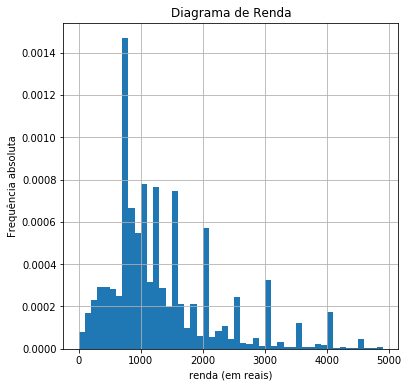

In [12]:
plot = renda.V9532.plot.hist(bins=faixa, title='Diagrama de Renda', figsize=(6,6), alpha=1, normed = 1)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
plt.grid(True)
plt.show()

### Criando DFs para fazer graficos

In [13]:
renda_net = renda[['V9532','V061111']].copy()

faixa1 = [1,2,3,4,5]

renda_net.V9532.loc[(renda_net.V9532 > 0) & (renda_net.V9532 <= 1000)] = 1
renda_net.V9532.loc[(renda_net.V9532 > 1000) & (renda_net.V9532 <= 2000)] = 2
renda_net.V9532.loc[(renda_net.V9532 > 2000) & (renda_net.V9532 <= 3000)] = 3
renda_net.V9532.loc[(renda_net.V9532 > 3000) & (renda_net.V9532 <= 4000)] = 4
renda_net.V9532.loc[(renda_net.V9532 > 4000) & (renda_net.V9532 <= 5000)] = 5

rel1 = pd.cut(renda_net.V9532[renda_net.V061111 == 1], faixa1, right=False)
renda_rel = (rel1.value_counts(sort=False, normalize=True)*100).round(decimals=1)
renda_rel

C:\Users\furyo\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[1, 2)    53.8
[2, 3)    36.3
[3, 4)     7.7
[4, 5)     2.2
Name: V9532, dtype: float64

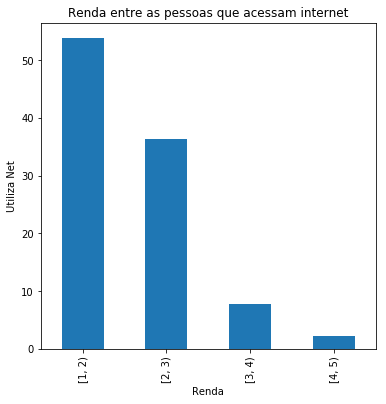

In [14]:
plot = renda_rel.plot(kind='bar',title='Renda entre as pessoas que acessam internet',figsize=(6, 6))
plt.ylabel('Utiliza Net')
plt.xlabel('Renda')
plt.show()

In [15]:
# Criando cada tabela para uma faixa de renda

renda_um = renda_net[(renda_net.V9532 == 1) & (renda_net.V061111 != 0)]

renda_dois = renda_net[(renda_net.V9532 == 2) & (renda_net.V061111 != 0)]

renda_tres = renda_net[(renda_net.V9532 == 3) & (renda_net.V061111 != 0)]

renda_quatro = renda_net[(renda_net.V9532 == 4) & (renda_net.V061111 != 0)]

renda_cinco = renda_net[(renda_net.V9532 == 5) & (renda_net.V061111 != 0)]

In [16]:
renda_um_tab = pd.crosstab(renda_um.V061111,renda_um.V9532)
renda_dois_tab = pd.crosstab(renda_dois.V061111,renda_dois.V9532)
renda_tres_tab = pd.crosstab(renda_tres.V061111,renda_tres.V9532)
renda_quatro_tab = pd.crosstab(renda_quatro.V061111,renda_quatro.V9532)
renda_cinco_tab = pd.crosstab(renda_cinco.V061111,renda_cinco.V9532)

In [17]:
renda_um_tab_porcentagem = renda_um_tab
renda_um_tab_porcentagem = renda_um_tab_porcentagem.rename(columns={1:'Sim',3:'Não'})

In [18]:
renda_um_tab = renda_um_tab.rename({1: 'Sim', 3: 'Não'})
renda_um_tab = renda_um_tab.drop([0])

renda_dois_tab = renda_dois_tab.rename({1: 'Sim', 3: 'Não'})
renda_dois_tab = renda_dois_tab.drop([0])

renda_tres_tab = renda_tres_tab.rename({1: 'Sim', 3: 'Não'})
renda_tres_tab = renda_tres_tab.drop([0])

renda_quatro_tab = renda_quatro_tab.rename({1: 'Sim', 3: 'Não'})
renda_quatro_tab = renda_quatro_tab.drop([0])

renda_cinco_tab = renda_cinco_tab.rename({1: 'Sim', 3: 'Não'})
renda_cinco_tab = renda_cinco_tab.drop([0])

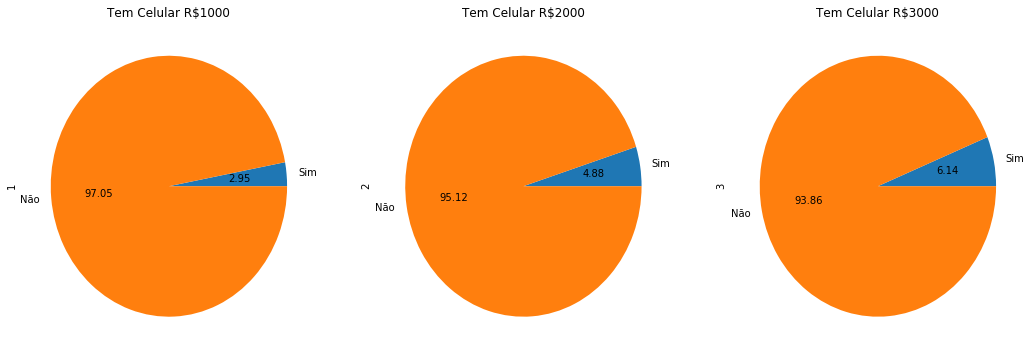

In [52]:
plt.subplot(131)
plot = renda_um_tab[1].plot(kind='pie',title = 'Tem Celular R$1000',autopct='%.2f',figsize=(18,6))

plt.subplot(132)
plot = renda_dois_tab[2].plot(kind='pie',title = 'Tem Celular R$2000',autopct='%.2f',figsize=(18,6))

plt.subplot(133)
plot = renda_tres_tab[3].plot(kind='pie',title = 'Tem Celular R$3000',autopct='%.2f',figsize=(18,6))


plt.show()

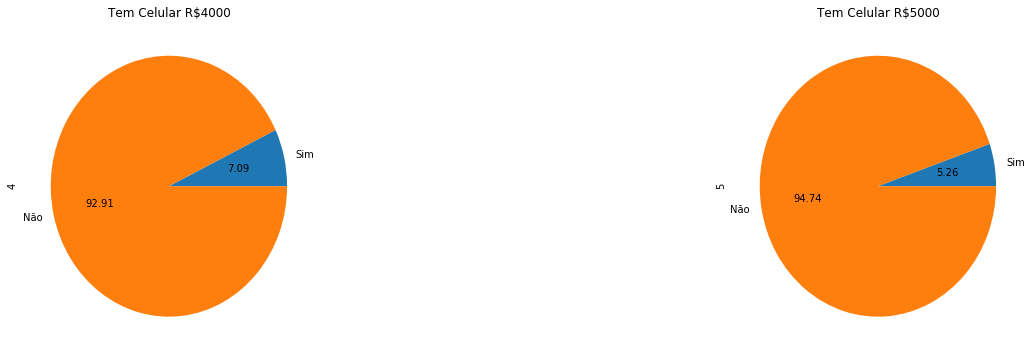

In [53]:
plt.subplot(131)
plot = renda_quatro_tab[4].plot(kind='pie',title = 'Tem Celular R$4000',autopct='%.2f',figsize=(18,6))

plt.subplot(133)
plot = renda_cinco_tab[5].plot(kind='pie',title = 'Tem Celular R$5000',autopct='%.2f',figsize=(18,6))

plt.show()

In [54]:
#plot = pd.crosstab(renda_um.V9532,renda_um.V061111).plot(kind='bar',title='Renda entre as pessoas que acessam internet até R$1000')
#plt.ylabel('Frequência Absoluta')
#plt.xlabel('Utiliza Net')
#plt.ylim(0,40000)

#plot = pd.crosstab(renda_dois.V9532,renda_dois.V061111).plot(kind='bar',title='Renda entre as pessoas que acessam internet até R$2000')
#plt.ylabel('Frequência Absoluta')
#plt.xlabel('Utiliza Net')
#plt.ylim(0,40000)

#plot = pd.crosstab(renda_tres.V9532,renda_tres.V061111).plot(kind='bar',title='Renda entre as pessoas que acessam internet até R$3000')
#plt.ylabel('Frequência Absoluta')
#plt.xlabel('Utiliza Net')
#plt.ylim(0,20000)

#plot = pd.crosstab(renda_quatro.V9532,renda_quatro.V061111).plot(kind='bar',title='Renda entre as pessoas que acessam internet até R$4000')
#plt.ylabel('Frequência Absoluta')
#plt.xlabel('Utiliza Net')
#plt.ylim(0,20000)

#plot = pd.crosstab(renda_cinco.V9532,renda_cinco.V061111).plot(kind='bar',title='Renda entre as pessoas que acessam internet até R$5000')
#plt.ylabel('Frequência Absoluta')
#plt.xlabel('Utiliza Net')
#plt.ylim(0,20000)

#plt.show()

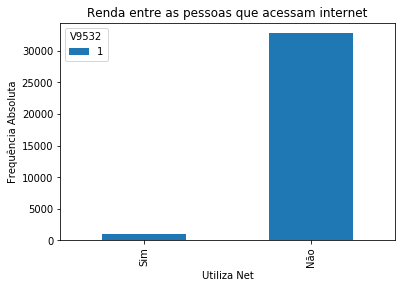

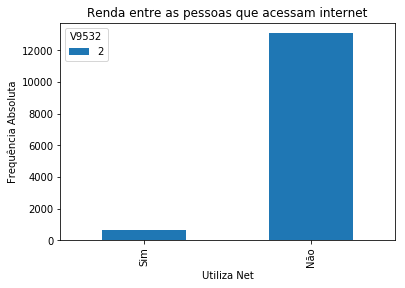

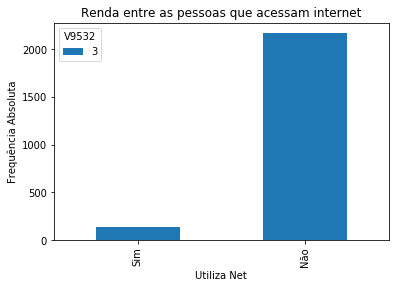

In [65]:
def graf_renda_net_br1():
    plot = renda_um_tab.plot(kind='bar',title='Renda entre as pessoas que acessam internet')
    plt.ylabel('Frequência Absoluta')
    plt.xlabel('Utiliza Net')

    plot = renda_dois_tab.plot(kind='bar',title='Renda entre as pessoas que acessam internet')
    plt.ylabel('Frequência Absoluta')
    plt.xlabel('Utiliza Net')

    plot = renda_tres_tab.plot(kind='bar',title='Renda entre as pessoas que acessam internet')
    plt.ylabel('Frequência Absoluta')
    plt.xlabel('Utiliza Net')

    plt.show()
graf_renda_net_br1()

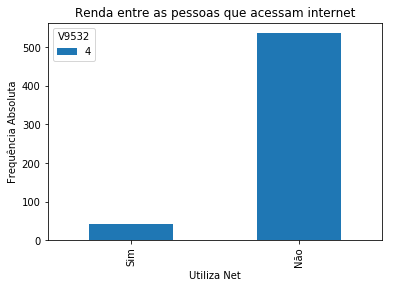

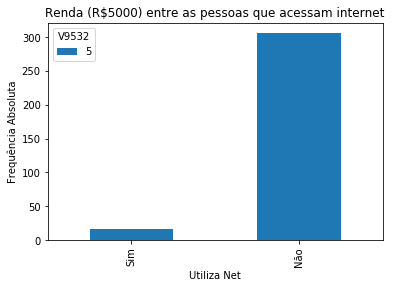

In [66]:
def graf_renda_net_br2():
    plot = renda_quatro_tab.plot(kind='bar',title='Renda entre as pessoas que acessam internet')
    plt.ylabel('Frequência Absoluta')
    plt.xlabel('Utiliza Net')

    plot = renda_cinco_tab.plot(kind='bar',title='Renda (R$5000) entre as pessoas que acessam internet')
    plt.ylabel('Frequência Absoluta')
    plt.xlabel('Utiliza Net')

    plt.show()
graf_renda_net_br2()

## Separando por regiões a utilização da internet

In [25]:
net_regiao = df_2015_limpa[['Renda_Mensal','Região','Utilizou_Internet','Computador','Tem_Celular','Internet_Celular']].copy()

net_norte = net_regiao[net_regiao.Região == 'Norte']
net_nordeste = net_regiao[net_regiao.Região == 'Nordeste']
net_sudeste = net_regiao[net_regiao.Região == 'Sudeste']
net_sul = net_regiao[net_regiao.Região == 'Sul']
net_centro_oeste = net_regiao[net_regiao.Região == 'Centro_Oeste']

## Internet na região norte

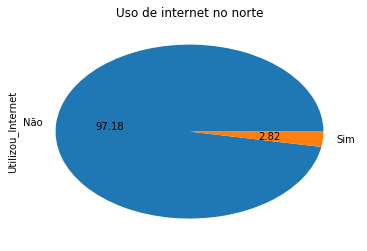

In [26]:
# Gráfico de porcentagem de pessoas no norte que usam internet

def net_norte_pizza():
    plot = net_norte['Utilizou_Internet'][net_norte['Utilizou_Internet'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Uso de internet no norte',autopct='%.2f')
    plt.show()
net_norte_pizza()

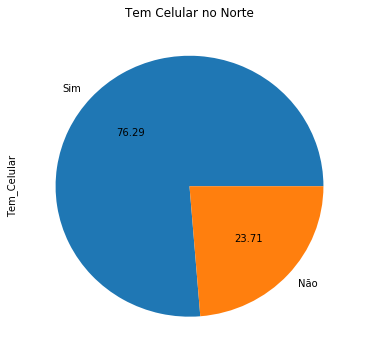

In [27]:
# Pessoas que possuem um celular
plot = net_norte['Tem_Celular'][net_norte['Tem_Celular'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Tem Celular no Norte',autopct='%.2f',figsize=(6,6))
plt.show()

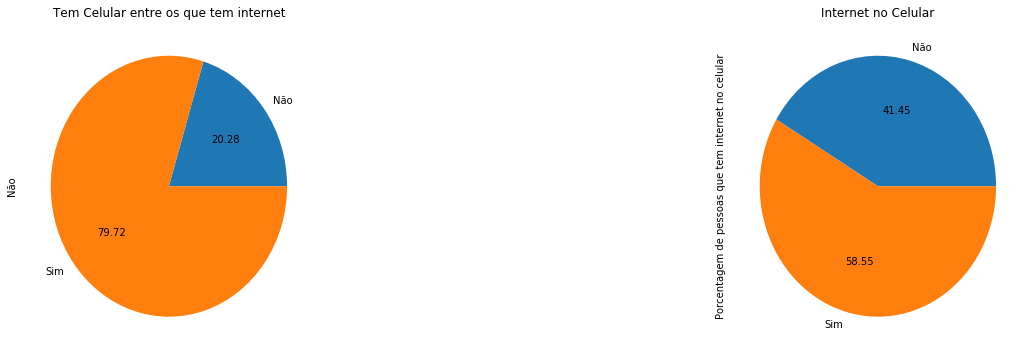

In [28]:
# Comparando as pessoas que tem internet no celular com as que tem o próprio celular
def pizza_net_norte():
    cel1 = pd.crosstab(net_norte['Tem_Celular'],net_norte['Internet_Celular']).drop(['Não se aplica'],axis=1)
    cel2 = pd.crosstab(net_norte['Internet_Celular'],net_norte['Tem_Celular']).drop(['Não se aplica'])
    plt.subplot(131)
    plot = cel1.Não.plot(kind = 'pie',autopct='%.2f',title = 'Tem Celular entre os que tem internet')
    plt.subplot(133)
    plot = cel2.Não.plot(kind = 'pie',autopct='%.2f',title = 'Internet no Celular',figsize=(18,6))

    plt.ylabel('Porcentagem de pessoas que tem internet no celular')
    plt.show()
pizza_net_norte()

In [29]:
net_norte.Renda_Mensal.loc[net_norte.Renda_Mensal == 'Sem declaração'] = 999999999999
net_norte.Renda_Mensal = net_norte.Renda_Mensal.astype('int64')

C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\furyo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


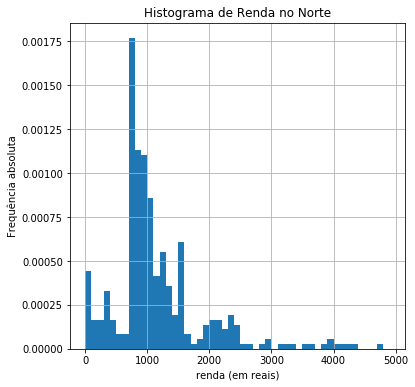

In [30]:
faixa = np.arange(0,5000,100)
def hist_renda_norte():
    plot = net_norte.Renda_Mensal[(net_norte.Renda_Mensal != 999999999999) & net_norte.Renda_Mensal != 0].plot.hist(bins=faixa, title='Histograma de Renda no Norte', figsize=(6,6), alpha=1, normed = 1)
    plt.ylabel('Frequência absoluta')
    plt.xlabel('renda (em reais)')
    plt.grid(True)
    plt.show()
hist_renda_norte()

# Internet na Região Nordeste

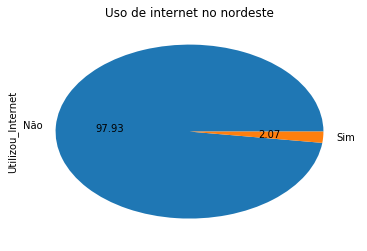

In [31]:
# Gráfico de porcentagem de pessoas no nordeste que usam internet

def net_nordeste_pizza():
    plot = net_nordeste['Utilizou_Internet'][net_nordeste['Utilizou_Internet'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Uso de internet no nordeste',autopct='%.2f')
    plt.show()
net_nordeste_pizza()

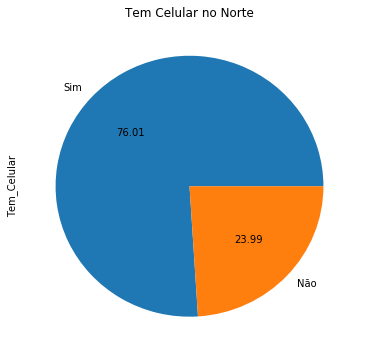

In [32]:
plot = net_nordeste['Tem_Celular'][net_nordeste['Tem_Celular'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Tem Celular no Norte',autopct='%.2f',figsize=(6,6))
plt.show()

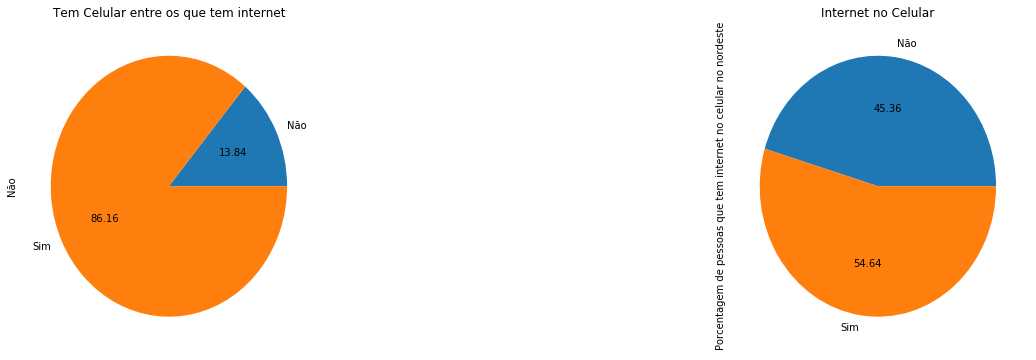

In [33]:
def pizza_net_nordeste():
    cel1 = pd.crosstab(net_nordeste['Tem_Celular'],net_nordeste['Internet_Celular']).drop(['Não se aplica'],axis=1)
    cel2 = pd.crosstab(net_nordeste['Internet_Celular'],net_nordeste['Tem_Celular']).drop(['Não se aplica'])
    plt.subplot(131)
    plot = cel1.Não.plot(kind = 'pie',autopct='%.2f',title = 'Tem Celular entre os que tem internet')
    plt.subplot(133)
    plot = cel2.Não.plot(kind = 'pie',autopct='%.2f',title = 'Internet no Celular',figsize=(18,6))

    plt.ylabel('Porcentagem de pessoas que tem internet no celular no nordeste')
    plt.show()
pizza_net_nordeste()

In [34]:
net_nordeste.Renda_Mensal.loc[net_nordeste.Renda_Mensal == 'Sem declaração'] = 999999999999
net_nordeste.Renda_Mensal = net_nordeste.Renda_Mensal.astype('int64')

C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\furyo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


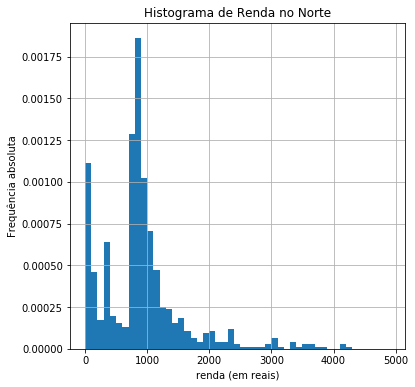

In [35]:
faixa = np.arange(0,5000,100)
def hist_renda_nordeste():
    plot = net_nordeste.Renda_Mensal[(net_nordeste.Renda_Mensal != 999999999999) & net_nordeste.Renda_Mensal != 0].plot.hist(bins=faixa, title='Histograma de Renda no Norte', figsize=(6,6), alpha=1, normed = 1)
    plt.ylabel('Frequência absoluta')
    plt.xlabel('renda (em reais)')
    plt.grid(True)
    plt.show()
hist_renda_nordeste()

# Internet na Região Sul

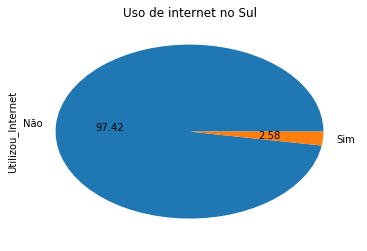

In [36]:
# Gráfico de porcentagem de pessoas no Sul que usam internet

def net_sul_pizza():
    plot = net_sul['Utilizou_Internet'][net_sul['Utilizou_Internet'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Uso de internet no Sul',autopct='%.2f')
    plt.show()
net_sul_pizza()

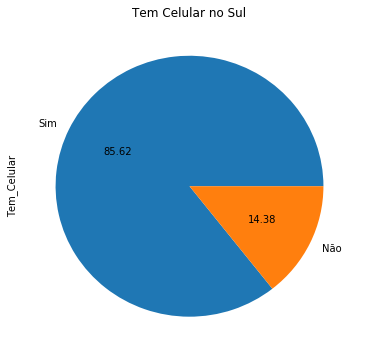

In [37]:
plot = net_sul['Tem_Celular'][net_sul['Tem_Celular'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Tem Celular no Sul',autopct='%.2f',figsize=(6,6))
plt.show()

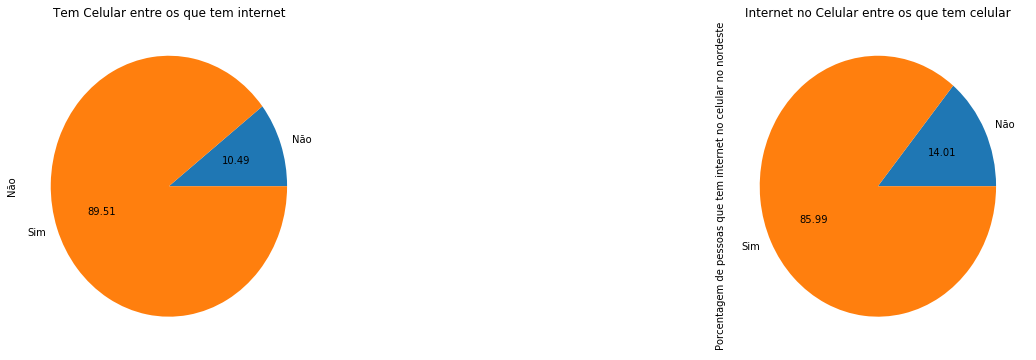

In [38]:
def pizza_net_sul():
    cel1 = pd.crosstab(net_sul['Tem_Celular'],net_sul['Internet_Celular']).drop(['Não se aplica'],axis=1)
    cel2 = pd.crosstab(net_sul['Internet_Celular'],net_sul['Tem_Celular'][net_sul['Tem_Celular'] == 'Sim']).drop(['Não se aplica'])
    plt.subplot(131)
    plot = cel1.Não.plot(kind = 'pie',autopct='%.2f',title = 'Tem Celular entre os que tem internet')
    plt.subplot(133)
    plot = cel2.Sim.plot(kind = 'pie',autopct='%.2f',title = 'Internet no Celular entre os que tem celular',figsize=(18,6))

    plt.ylabel('Porcentagem de pessoas que tem internet no celular no nordeste')
    plt.show()
pizza_net_sul()

In [39]:
net_sul.Renda_Mensal.loc[net_sul.Renda_Mensal == 'Sem declaração'] = 999999999999
net_sul.Renda_Mensal = net_sul.Renda_Mensal.astype('int64')

C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\furyo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


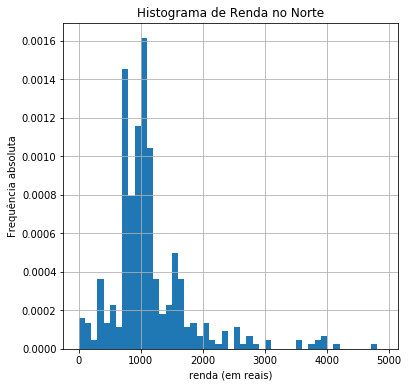

In [40]:
faixa = np.arange(0,5000,100)
def hist_renda_sul():
    plot = net_sul.Renda_Mensal[(net_sul.Renda_Mensal != 999999999999) & net_sul.Renda_Mensal != 0].plot.hist(bins=faixa, title='Histograma de Renda no Norte', figsize=(6,6), alpha=1, normed = 1)
    plt.ylabel('Frequência absoluta')
    plt.xlabel('renda (em reais)')
    plt.grid(True)
    plt.show()
hist_renda_sul()

# Internet na região Sudeste

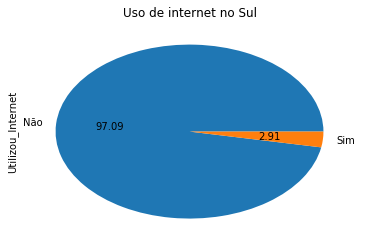

In [41]:
# Gráfico de porcentagem de pessoas no Sudeste que usam internet

def net_sudeste_pizza():
    plot = net_sudeste.Utilizou_Internet[net_sudeste['Utilizou_Internet'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Uso de internet no Sul',autopct='%.2f')
    plt.show()
net_sudeste_pizza()

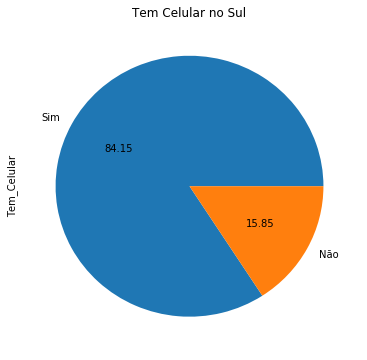

In [42]:
plot = net_sudeste['Tem_Celular'][net_sudeste['Tem_Celular'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Tem Celular no Sul',autopct='%.2f',figsize=(6,6))
plt.show()

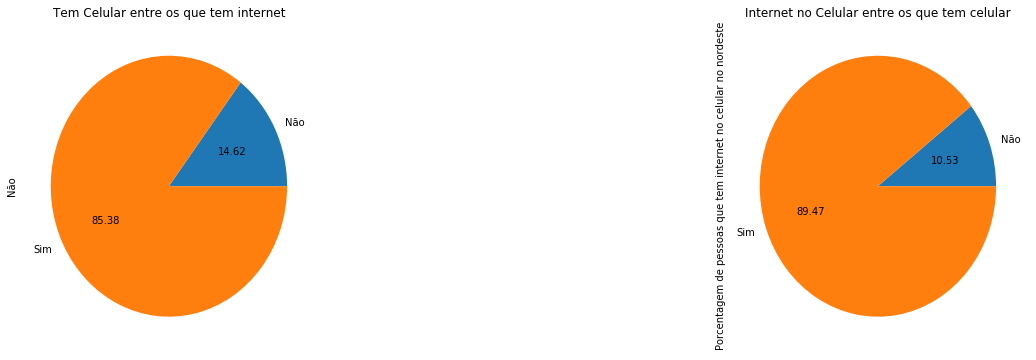

In [43]:
def pizza_net_sudeste():
    cel1 = pd.crosstab(net_sudeste['Tem_Celular'],net_sudeste['Internet_Celular']).drop(['Não se aplica'],axis=1)
    cel2 = pd.crosstab(net_sudeste['Internet_Celular'],net_sudeste['Tem_Celular'][net_sudeste['Tem_Celular'] == 'Sim']).drop(['Não se aplica'])
    plt.subplot(131)
    plot = cel1.Não.plot(kind = 'pie',autopct='%.2f',title = 'Tem Celular entre os que tem internet')
    plt.subplot(133)
    plot = cel2.Sim.plot(kind = 'pie',autopct='%.2f',title = 'Internet no Celular entre os que tem celular',figsize=(18,6))

    plt.ylabel('Porcentagem de pessoas que tem internet no celular no nordeste')
    plt.show()
pizza_net_sudeste()

In [44]:
net_sudeste.Renda_Mensal.loc[net_sudeste.Renda_Mensal == 'Sem declaração'] = 999999999999
net_sudeste.Renda_Mensal = net_sudeste.Renda_Mensal.astype('int64')

C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\furyo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


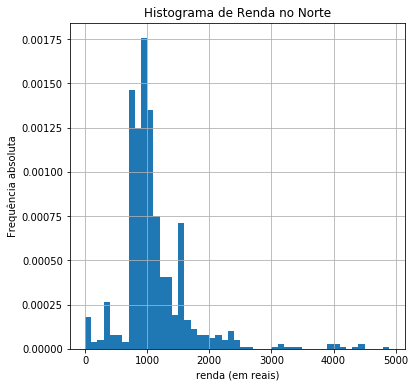

In [45]:
faixa = np.arange(0,5000,100)
def hist_renda_sudeste():
    plot = net_sudeste.Renda_Mensal[(net_sudeste.Renda_Mensal != 999999999999) & net_sudeste.Renda_Mensal != 0].plot.hist(bins=faixa, title='Histograma de Renda no Norte', figsize=(6,6), alpha=1, normed = 1)
    plt.ylabel('Frequência absoluta')
    plt.xlabel('renda (em reais)')
    plt.grid(True)
    plt.show()
hist_renda_sudeste()

# Internet na região centro oeste

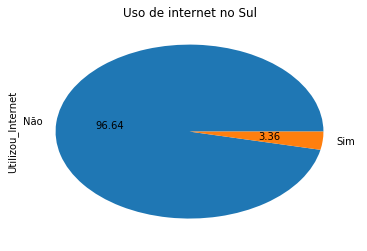

In [46]:
# Gráfico de porcentagem de pessoas no Centro Oeste que usam internet

def net_centro_oeste_pizza():
    plot = net_centro_oeste.Utilizou_Internet[net_centro_oeste['Utilizou_Internet'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Uso de internet no Sul',autopct='%.2f')
    plt.show()
net_centro_oeste_pizza()

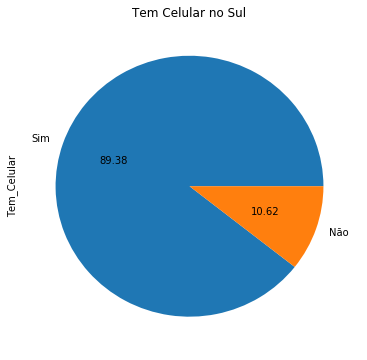

In [47]:
plot = net_centro_oeste['Tem_Celular'][net_centro_oeste['Tem_Celular'] != 'Não se aplica'].value_counts().plot(kind='pie',title = 'Tem Celular no Sul',autopct='%.2f',figsize=(6,6))
plt.show()

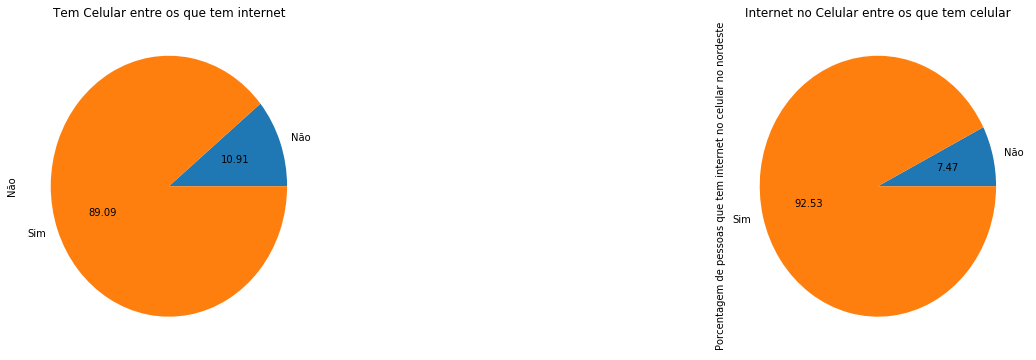

In [48]:
def pizza_net_centro_oeste():
    cel1 = pd.crosstab(net_centro_oeste['Tem_Celular'],net_centro_oeste['Internet_Celular']).drop(['Não se aplica'],axis=1)
    cel2 = pd.crosstab(net_centro_oeste['Internet_Celular'],net_centro_oeste['Tem_Celular'][net_centro_oeste['Tem_Celular'] == 'Sim']).drop(['Não se aplica'])
    plt.subplot(131)
    plot = cel1.Não.plot(kind = 'pie',autopct='%.2f',title = 'Tem Celular entre os que tem internet')
    plt.subplot(133)
    plot = cel2.Sim.plot(kind = 'pie',autopct='%.2f',title = 'Internet no Celular entre os que tem celular',figsize=(18,6))

    plt.ylabel('Porcentagem de pessoas que tem internet no celular no nordeste')
    plt.show()
pizza_net_centro_oeste()

In [49]:
net_centro_oeste.Renda_Mensal.loc[net_centro_oeste.Renda_Mensal == 'Sem declaração'] = 999999999999
net_centro_oeste.Renda_Mensal = net_centro_oeste.Renda_Mensal.astype('int64')

C:\Users\furyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\furyo\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


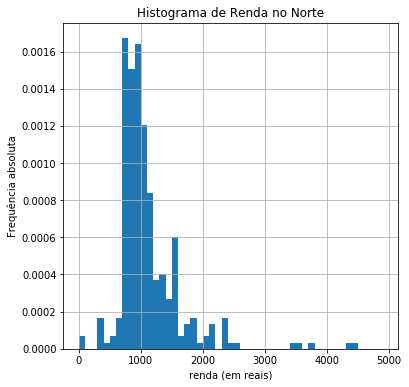

In [50]:
faixa = np.arange(0,5000,100)
def hist_renda_centro_oeste():
    plot = net_centro_oeste.Renda_Mensal[(net_centro_oeste.Renda_Mensal != 999999999999) & net_centro_oeste.Renda_Mensal != 0].plot.hist(bins=faixa, title='Histograma de Renda no Norte', figsize=(6,6), alpha=1, normed = 1)
    plt.ylabel('Frequência absoluta')
    plt.xlabel('renda (em reais)')
    plt.grid(True)
    plt.show()
hist_renda_centro_oeste()

# Conclusão e análises 

Histograma renda, como já esperado, temos uma assimetria a direita, mostrando que a maioria das pessoas tem um salário menor que a média, isso pois temos poucas pessoas ganhando muito puxando a média para maior!

Temos os gráficos em barras de quantidade de pessoas que usam a internet e sua renda, podemos observar que conforme a renda aumenta, a quantidade de pessoas que disseram não à pergunta "Utilizou internte" diminui, logo, podemos observar que mais pessoas tem acesso a internet conforme sua renda aumenta.

